<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title : P62 - Convoluted Neural Network

#### Name: 

#### IC Number:

#### Date :

#### Introduction : 



#### Conclusion :






## Convoluted Neural Networks

(material adapted from https://www.sitepoint.com/keras-digit-recognition-tutorial/, https://towardsdatascience.com/understanding-neural-networks-from-neuron-to-rnn-cnn-and-deep-learning-cd88e90e0a90)

In this tutorial, we’re going to identify digits — which is a simple version of image classification. An image is essentially a collection of dots or pixels. A pixel can be identified through its component colors (RGB). Therefore, the input data of an image is essentially a 2D array of pixels, each representing a color.

If we were to train a regular neural network based on image data, we’d have to provide a long list of inputs, each of which would be connected to the next hidden layer. This makes the process difficult to scale up.

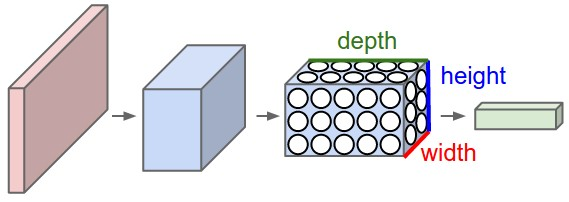

### Convolutional Neural Network Architecture
In a convoluted neural network (CNN), the layers are arranged in a 3D array (X-axis coordinate, Y-axis coordinate and color). Consequently, a node of the hidden layer would only be connected to a small region in the vicinity of the corresponding input layer, making the process far more efficient than a traditional neural network. CNNs, therefore, are popular when it comes to working with images and videos.

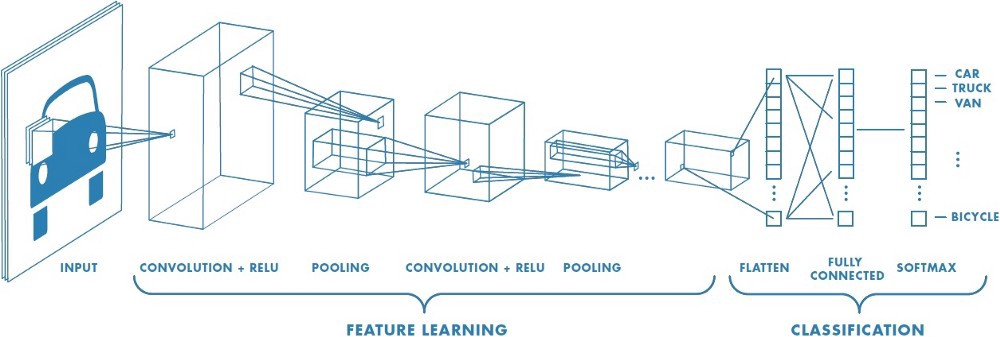

### Another view of CNN:
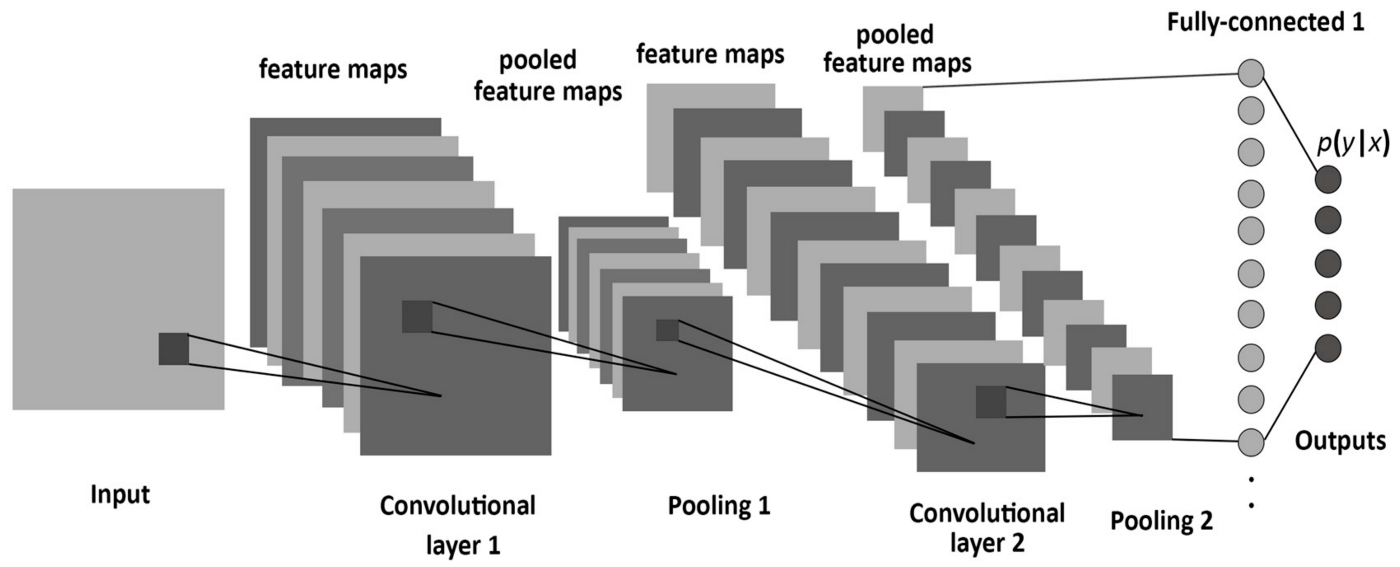

##### Convolution: 
Convolution operates on two signals (in 1D) or two images (in 2D): you can think of one as the “input” signal (or image), and the other (called the kernel) as a “filter” on the input image, producing an output image (so convolution takes two images as input and produces a third as output).

In layman terms it takes in an input signal and applies a filter over it, essentially multiplies the input signal with the kernel to get the modified signal. Mathematically, a convolution of two functions f and g is defined as

Reference: https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac

Reference: https://www.datatechnotes.com/2020/02/classification-example-with-keras-cnn.html

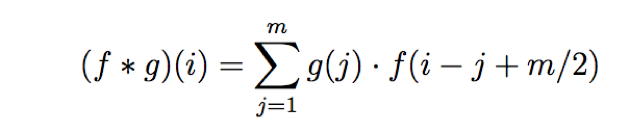

which, is nothing but dot product of the input function and a kernel function.

In case of Image processing, it is easier to visualize a kernel as sliding over an entire image and thus changing the value of each pixel in the process.

#### Pooling:
Pooling is a sample-based discretization process. The objective is to down-sample an input representation (image, hidden-layer output matrix, etc.), reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned.

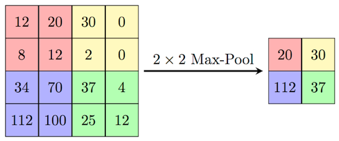

There are 2 main types of pooling commonly known as max and min pooling. As the name suggests max pooling is based on picking up the maximum value from the selected region and min pooling is based on picking up the minimum value from the selected region.


***TO SUMMARIZE:*** Thus as one can see A Convolutional Neural Network or CNN is basically a deep neural network which consists of hidden layers having convolution and pooling functions in addition to the activation function for introducing non-linearity.

### Convolutional Neural Network Layers
The various types of layers in a CNN are as follows:

1. convolutional layers: these run input through certain filters, which identify features in the image
2. pooling layers: these combine convolutional features, helping in feature reduction
3. flatten layers: these convert an N-dimentional layer to a 1D layer
4. classification layer: the final layer, which tells us the final result.

### Example

The convolutional layer learns local patterns of data in convolutional neural networks. It helps to extract the features of input data to provide the output. In this tutorial, we'll learn how to implement a convolutional layer to classify the Iris dataset. We'll use the Conv1D layer of Keras API. The tutorial covers:

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique

iris = load_iris()
x, y = iris.data, iris.target
print(x.shape)
(150, 4) 

(150, 4)


(150, 4)

In [2]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)
(150, 4, 1) 


(150, 4, 1)


(150, 4, 1)

In [3]:
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(4,1)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3, 64)             192       
_________________________________________________________________
dense (Dense)                (None, 3, 16)             1040      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 1,283
Trainable params: 1,283
Non-trainable params: 0
_________________________________________________________________


#### Predicting and accuracy check

We'll fit the model with train data then will check the training accuracy.

In [ ]:
model.fit(xtrain, ytrain, batch_size=16,epochs=100, verbose=0)

acc = model.evaluate(xtrain, ytrain)
print("Loss:", acc[0], " Accuracy:", acc[1])

Now we can predict the test data.

In [ ]:
pred = model.predict(xtest)
pred_y = pred.argmax(axis=-1)

Finally, we'll check the prediction accuracy with the confusion matrix.


In [ ]:
cm = confusion_matrix(ytest, pred_y)
print(cm)